# Integrated Single-Cell and Condition-Based Analyses

## Setup

Also see the Single Cell tutorial.



* `files`: Dictionary of `file_path` arguments to pass to `corescpy.Omics` for each individual sample. Can contain CellRanger output directories (barcode-features-matrix), `AnnData` objects or `.h5ad` files (or `MuData`, etc. with further specifications, such as `assay=<assay key here>` in the `Omics()` initialization function).
* `kws_pp`: Preprocessing keyword argument dictionary to apply to individual samples. Can make a list of dictionaries (in the same order as `files`) to use separate preprocessing parameters for different samples.
* `kws_cluster`: Clustering keyword argument dictionary to apply to individual samples. Can make a list of dictionaries (in the same order as `files`) to use separate clustering parameters for different samples.
* `kws_cluster_integrated`: Clustering parameters for the integrated object.

**To integrate samples**: 
* The main idea is that you specify preprocessing and clustering keyword arguments up-front so that the samples can be individually processed before integration. 
* Then, you can follow the workflow in this notebook pretty much as normal, except skipping the `self.preprocess()` step (e.g., start with clustering the integrated object, then proceed downstream).
* The integrated object should have an attribute `._integrated` that signals the clustering method to set `kws_pca=False` in `self.cluster()` so that the Harmony-adjusted PCA created during integration (rather than a newly-calculated one) will be used. To be safe, you could set `kws_pca=False` yourself too.
* Note that in the example below, all samples use the same pre-processing and clustering parameters.
  * You could also specify a list of different sets for each sample in the same order as in `file_path` (e.g., the first list element of the list would be the dictionary of arguments applied to sample `PSC001`.).
  * For example, you could define different dictionaries of arguments called `kws_pp_psc001`, `kws_pp_psc002`, `kws_pp_psc003`, then change the line below defining `kws_pp` to `kws_pp = [kws_pp_psc001, kws_pp_psc002, kws_pp_psc003]`.
  * You can do the same for `kws_init` and `kws_cluster`.

In case you want to save the individual objects, click the drop-down below to see how to process and cluster samples individually (after defining `kws_init`, `kws_pp`, `kws_cluster`, and `kws_cluster_integrated` as in the below example), then integrate the processed arguments (setting `kws_pp=None` and `kws_cluster=None` in the `kws_multi` dictionary, as you've already preprocessed and clustered the individual samples).

<details>
<summary>Click here.</summary>

```python
in_files = {"sample_id_1": "path/to/cellranger_1",
            "sample_id_2": "path/to/cellranger_2",
            "sample_id_3": "path/to/cellranger_3"}
out_files = {"sample_id_1": "path/to/h5ad_1",
             "sample_id_2": "path/to/h5ad_2",
             "sample_id_3": "path/to/h5ad_3"}

selves = dict(zip([cr.Omics(in_files[x], **kws_init) for x in in_files]))
for s in selves:
    selves[s].preprocess(**kws_pp)
    selves[s].cluster(**kws_cluster)
    # Can execute other methods here as well if desired
    selves[s].write(out_files[s])

self_integrated = cr.Omics(out_files, **kws_init, 
                           kws_multi=dict(kws_pp=None, kws_cluster=None))
self_integrated.cluster(**kws_cluster_integrated)
```
</details>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import re
import matplotlib.pyplot as plt
import seaborn as sb
import scanpy as sc
import pandas as pd
import corescpy as cr
from corescpy import Omics

# Options
DIR = "/mnt/cho_lab/disk2/elizabeth/projects/crispr-screening/analysis"
files = {
    "HH03": f"{DIR}/corescpy/HH03_filtered_revised.h5ad",
    "HH04": f"{DIR}/corescpy/HH04_filtered_revised.h5ad",
    "HH05": f"{DIR}/corescpy/HH05_filtered_revised.h5ad",
    "HH06": f"{DIR}/corescpy/HH06_filtered_revised.h5ad",
    "HH07": f"{DIR}/corescpy/HH07_filtered_revised.h5ad",
    "HH09": f"{DIR}/corescpy/HH09_filtered_revised.h5ad"
}

# Annotation Options
assign = pd.read_csv(os.path.join(os.path.expanduser(
    "~"), "corescpy/examples/markers_lineages.csv"), index_col=0)
col_annotation = "group"
assign = assign[assign["Bucket"].isin(["Monocyte"])][[col_annotation]]

# Preprocessing Arguments
outlier_mads = {"pct_counts_mt": [None, 5],
                "pct_counts_ribo": [None, 5],
                "n_counts": [5, None]}
kws_pp = {"kws_hvg": True, "target_sum": 1e4, "kws_scale": "log",
          "regress_out": None, "outlier_mads": outlier_mads,
          "cell_filter_ngene": [3, None], "gene_filter_n_cell": [3, None]}

# Clustering & Annotation Arguments
kws_cluster = {"kws_umap": {"min_dist": 0.3}, "use_highly_variable": True,
               "resolution": 0.6}
kws_cluster_integrated = {"kws_umap": {"min_dist": 0},
                          "use_highly_variable": True, "resolution": 1.2}

# Define Column Names, Keys for Control, Metadata, etc.
kws_init = dict(col_sample_id="sample", col_subject_id="subject",
                col_condition="MDP", key_control="No MDP",
                key_treatment="MDP")   # col_condition, key_X are optional

## Integration

This code integrates the samples using Harmony after preprocessing and clustering them individually.

For brevity, the output is not shown; however, it simply prints output for each individual sample, so you can refer to the Single Cell tutorial to see an example. (Integration output would just be multiple sets of what is shown in that tutorial.)

In [ ]:
self = cr.Omics(files, **kws_init, kws_multi=dict(
    kws_pp=kws_pp, kws_cluster=kws_cluster, kws_harmony=True))

## Multi-Sample QC Plots


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/corescpy/corescpy/processing/preprocessing.py", line 610, in perform_qc
    sc.pl.scatter(adata, x="total_counts", y=v, ax=aij,
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/legacy_api_wrap/__init__.py", line 80, in fn_compatible
    return fn(*args_all, **kw)
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/scanpy/plotting/_anndata.py", line 166, in scatter
    return _scatter_obs(**args)
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/scanpy/plotting/_anndata.py", line 417, in _scatter_obs
    mask = scatter_group(
  File "/home/elizabeth/elizabeth/miniconda3/envs/bio/lib/python3.10/site-packages/scanpy/plotting/_utils.py", line 602, in scatter_group
    color = adata.uns[key + "_colors"][cat_code]
IndexErr

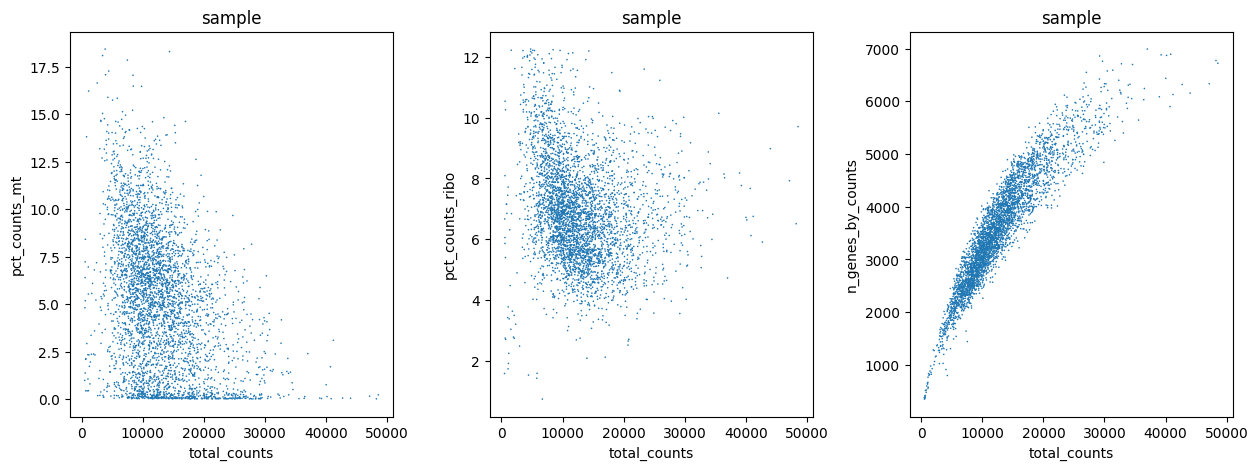

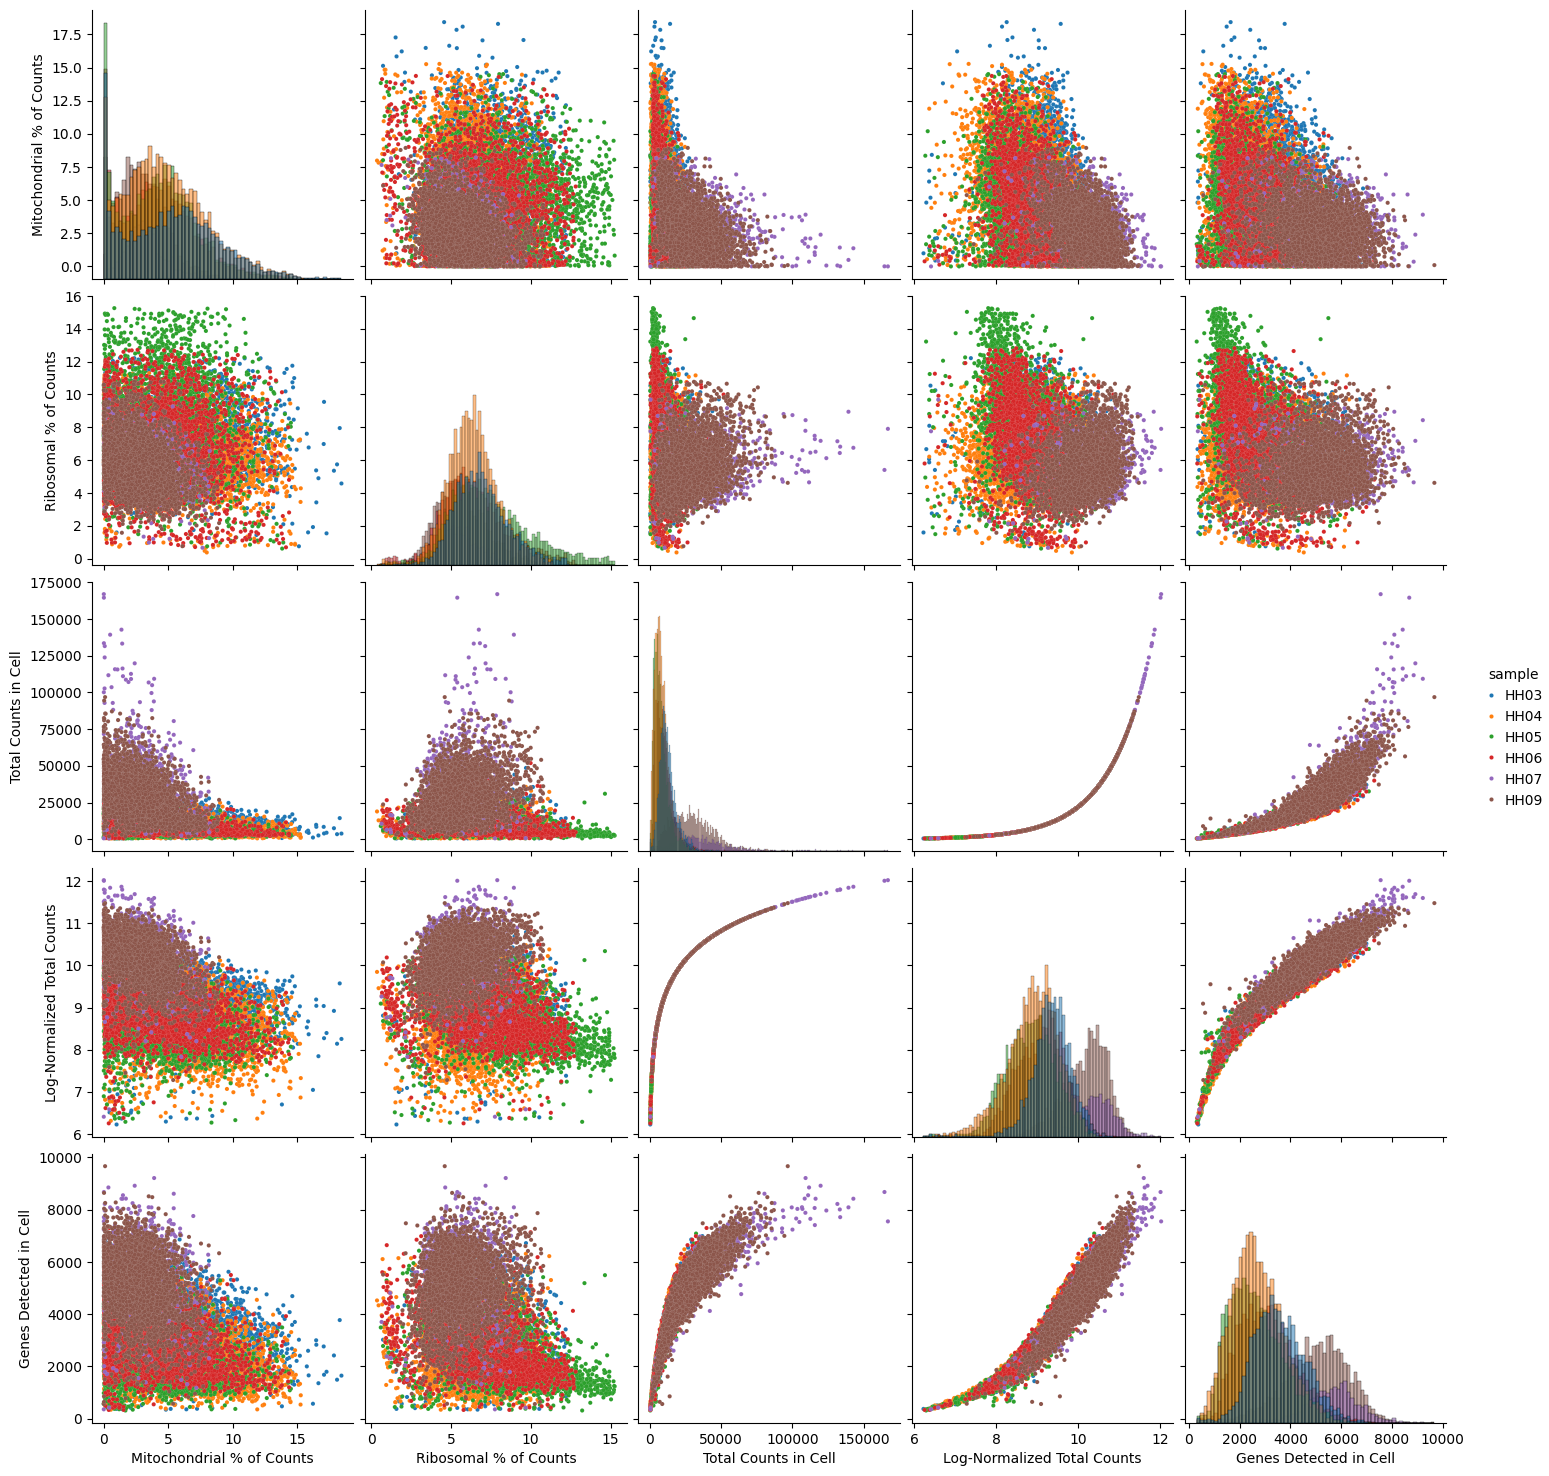

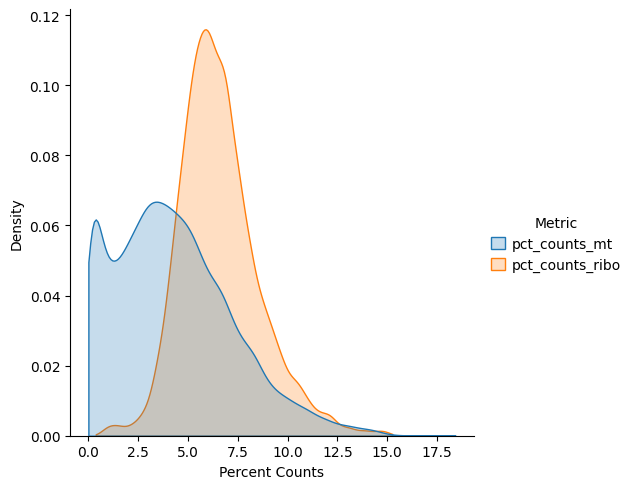

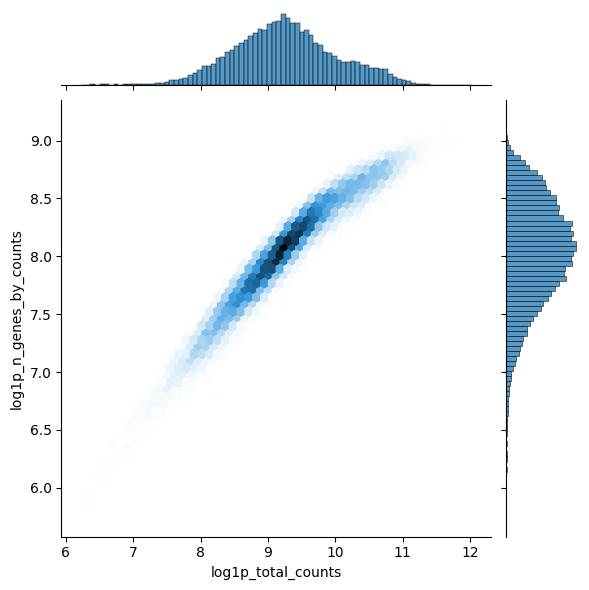

In [3]:
_ = cr.pp.perform_qc(self.rna, hue=self._columns["col_sample_id"])

## Clustering, DEGs/Markers, and Annotation

For more details, see the "Single Cell" tutorial.



`kws_pca`=False. Using existing if present:

AnnData object with n_obs × n_vars = 22798 × 36601
    obs: 'MDP', 'Oxia', 'feature_call', 'feature_call_processed', 'feature_split', 'guide_split', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'log_counts', 'n_genes', 'n_genes_by_counts', 'n_obs_raw', 'num_features', 'num_umis', 'num_umis_original', 'num_umis_processed', 'percent_umis', 'perturbation', 'perturbed', 'sample', 'target_gene', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'total_umis_cell', 'pct_counts_mt', 'pct_counts_ribo', 'n_counts', 'outlier_pct_counts_mt_threshold', 'outlier_pct_counts_ribo_threshold', 'outlier_n_counts_threshold', 'outlier', 'assay_protein', 'col_gene_symbols', 'col_cell_type', 'col_sample_id', 'col_batch', 'col_subject', 'col_condition', 'col_num_umis', 'kws_hvg', 'target_sum', 'regress_out', 'outlier_mads', 'cell_filter_ngene', 'gene_filter_n_cell', 'kws_scale', 'leiden'
    var: 'gene

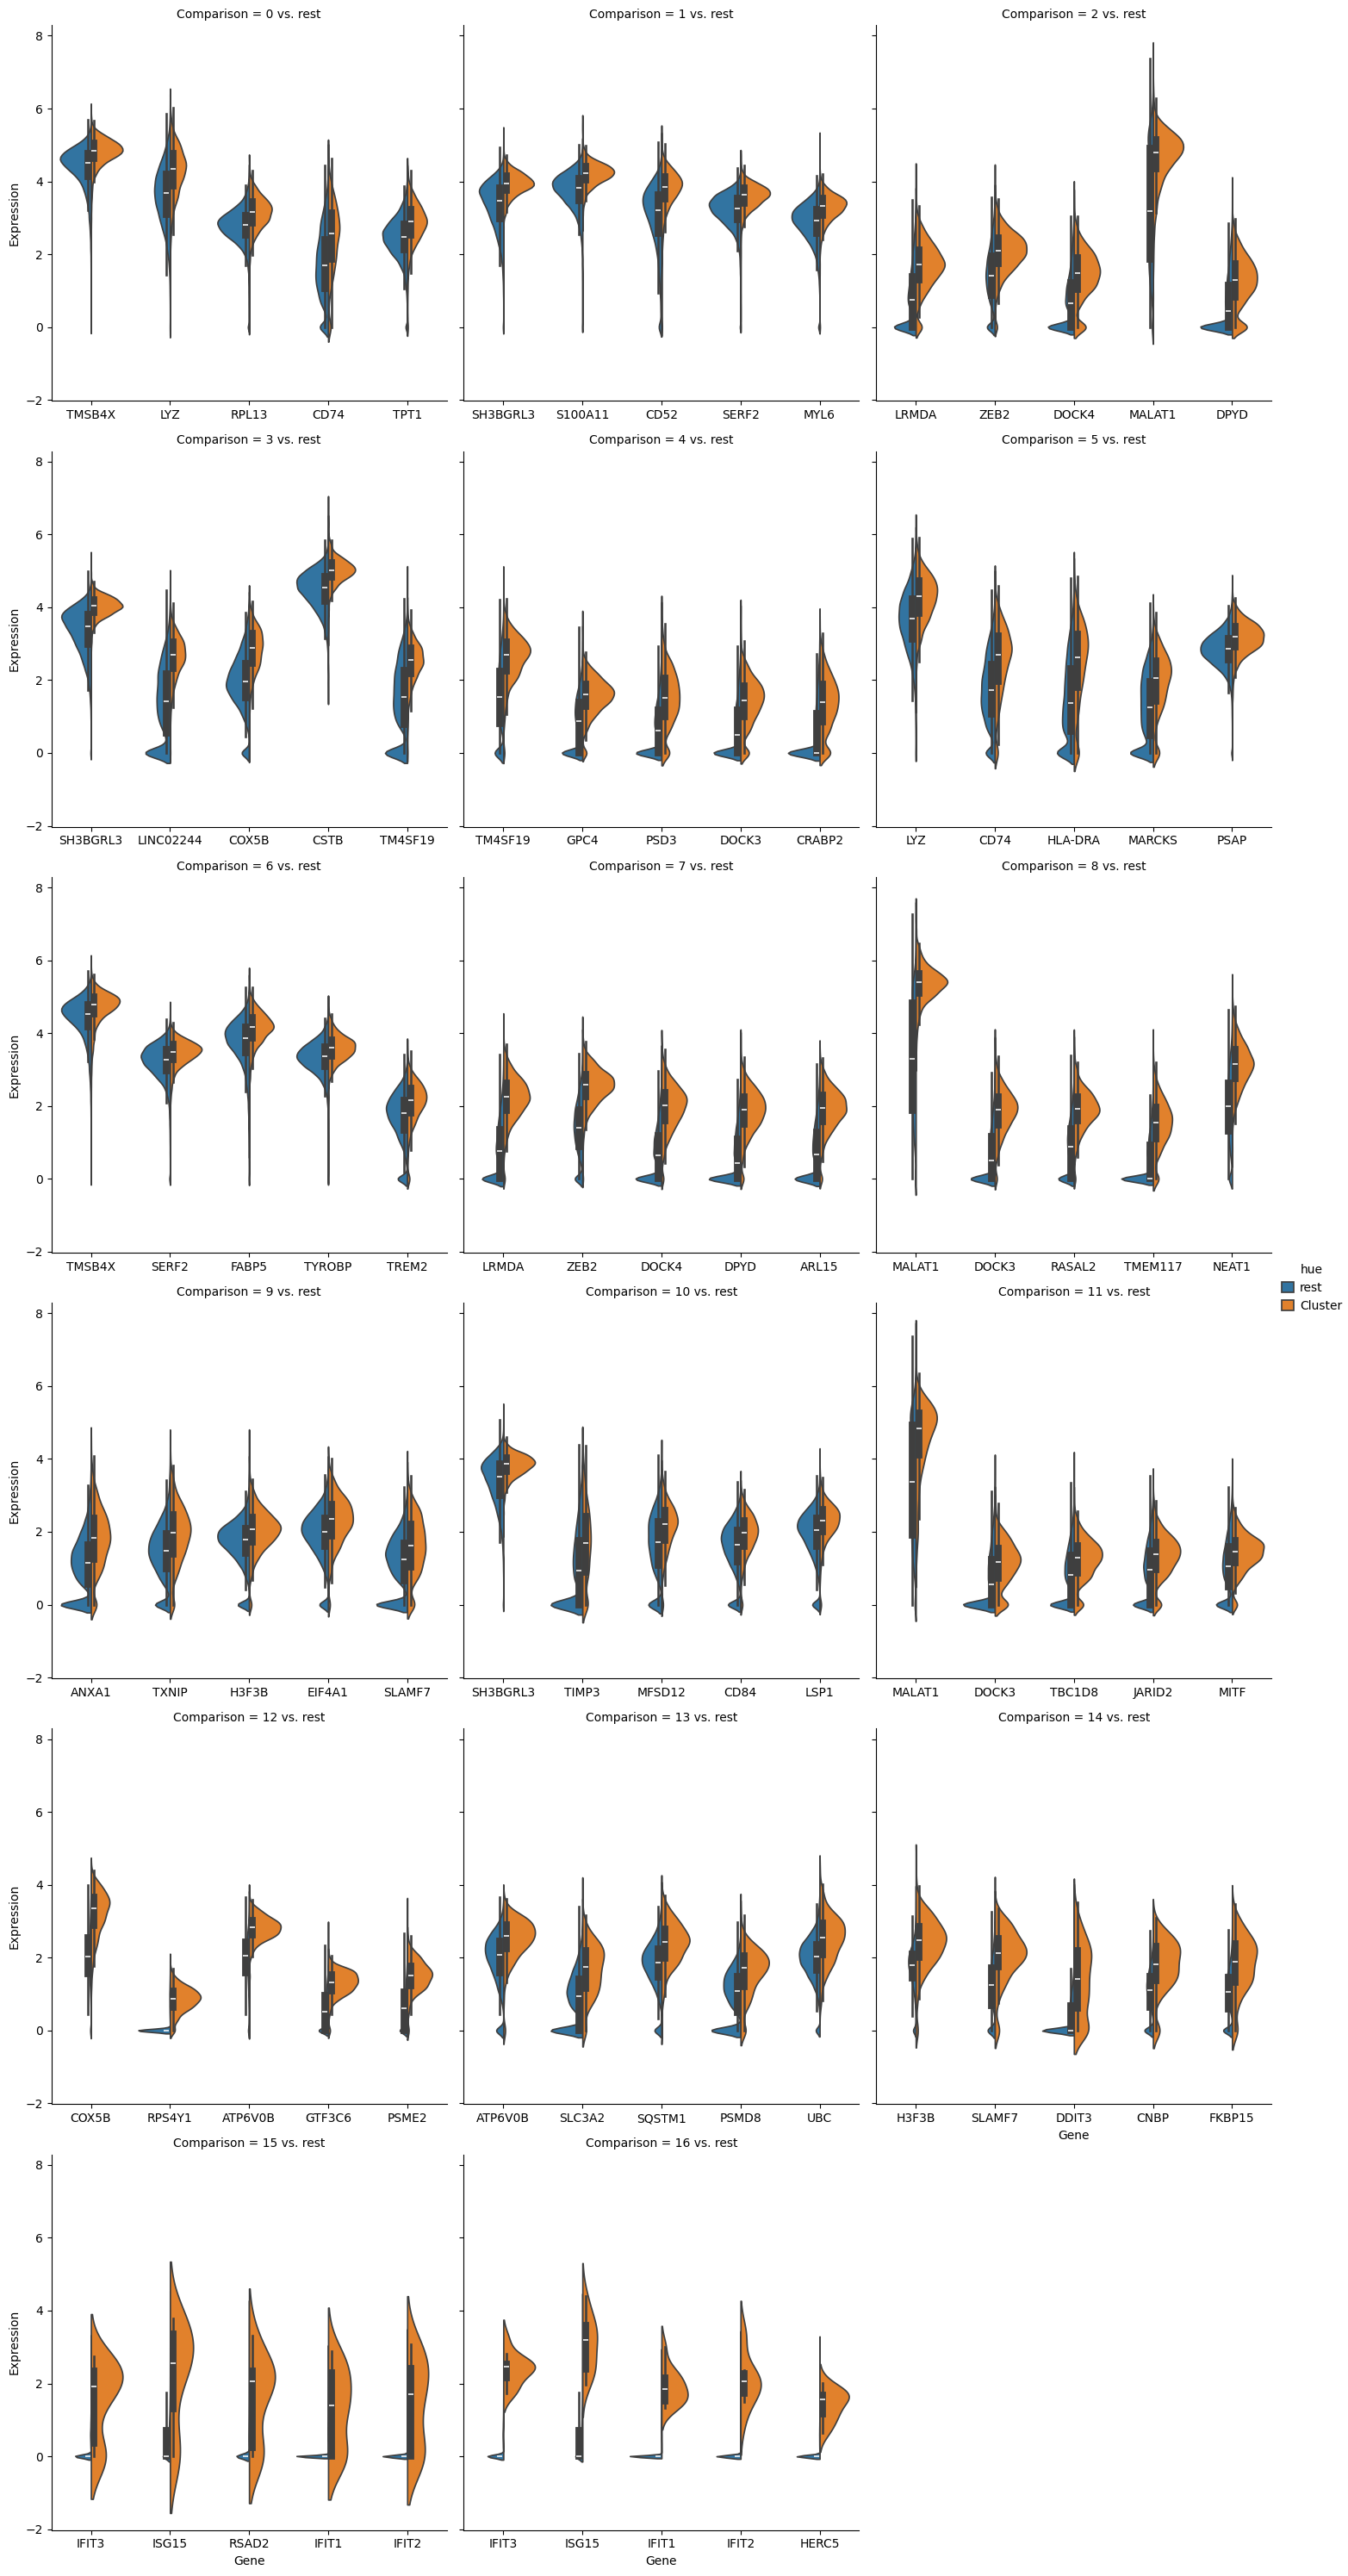

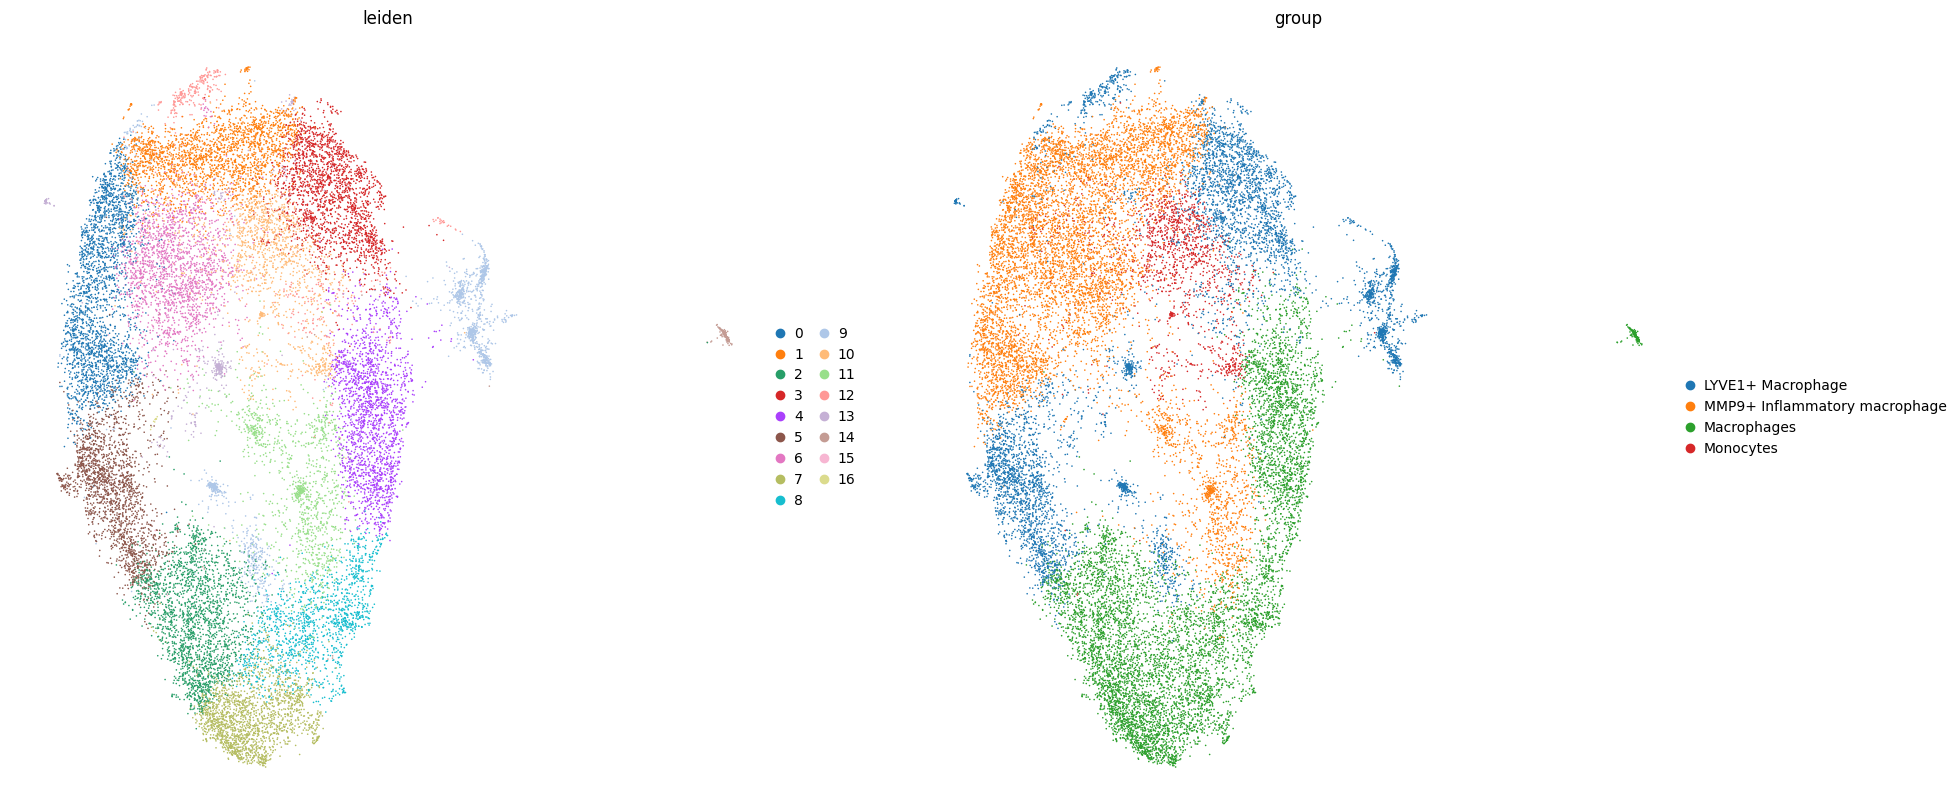

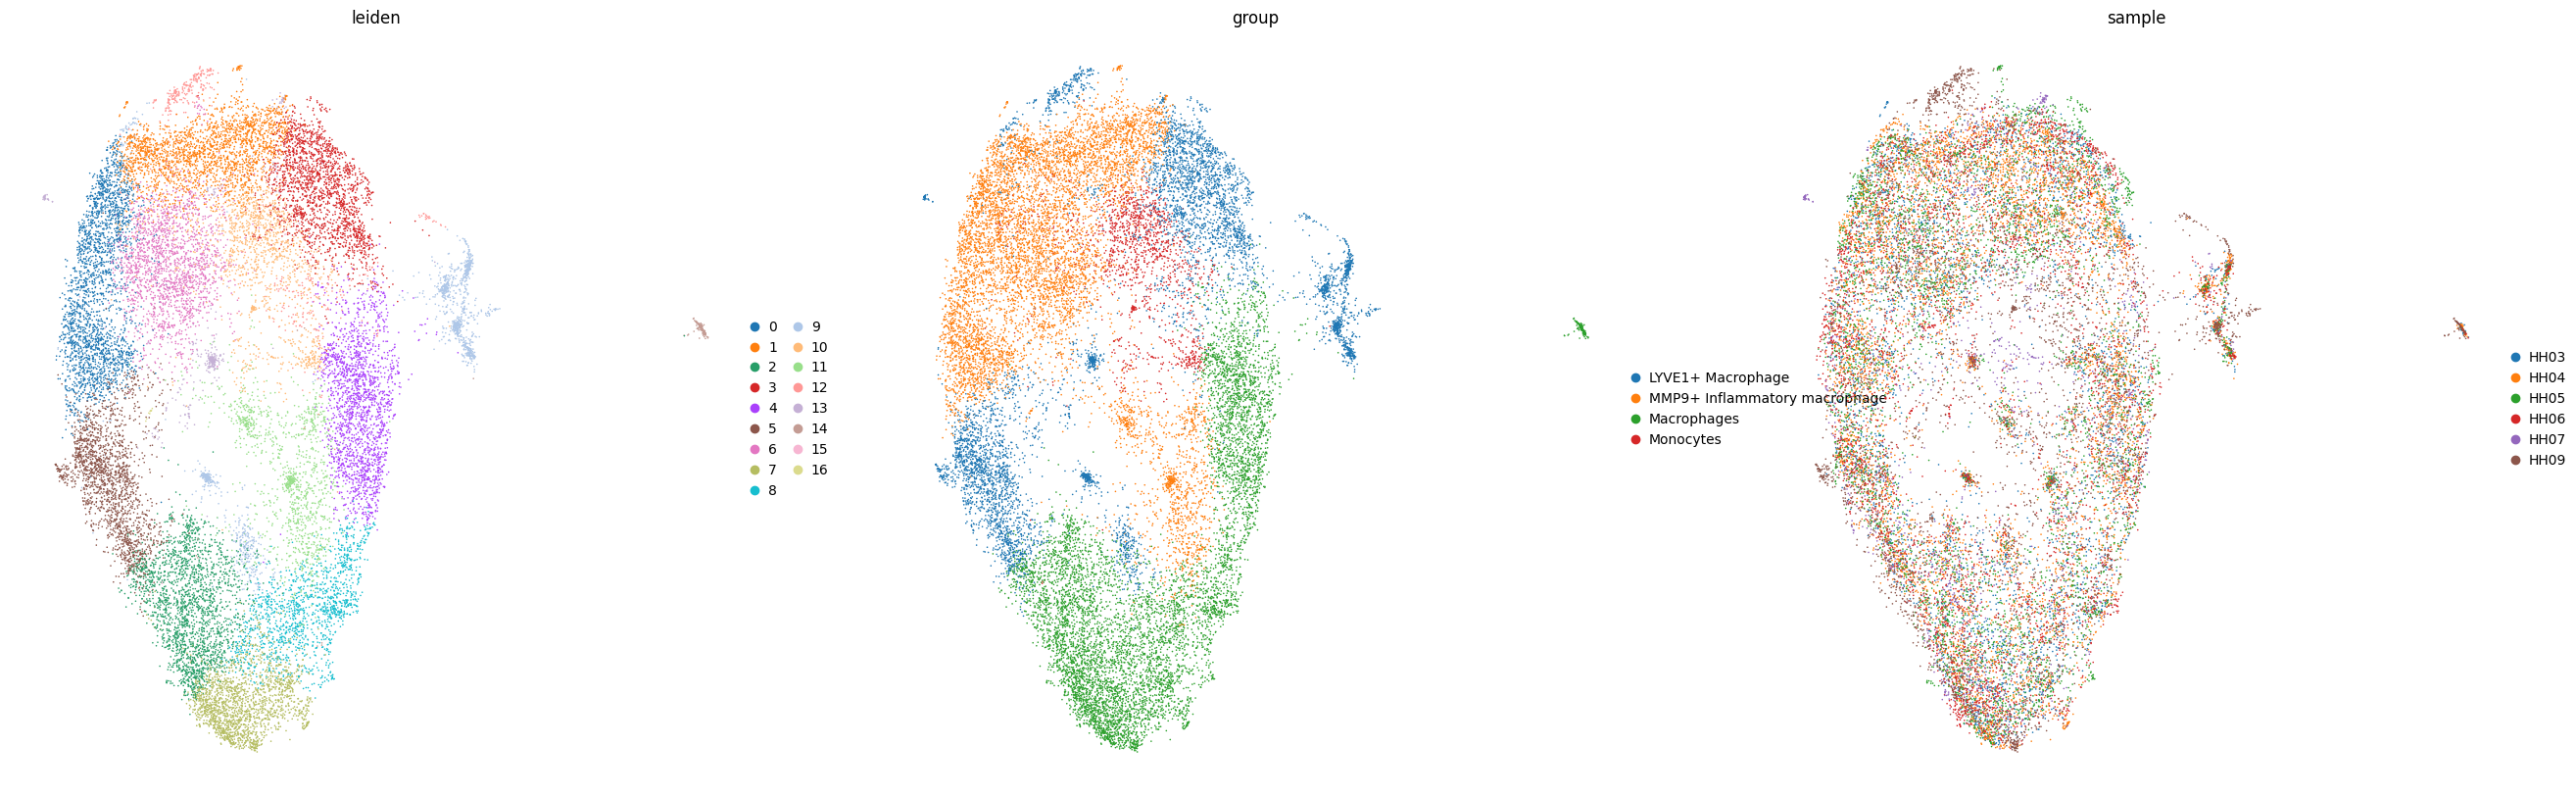

CPU times: user 10min 5s, sys: 9min 22s, total: 19min 28s
Wall time: 4min 16s


In [4]:
%%time

self.cluster(**kws_cluster_integrated)  # clustering
marks, figs_m = self.find_markers(n_genes=20)  # DEGs/cluster markers
_ = self.annotate_clusters(assign, col_annotation=col_annotation)  # annotate
self.plot_umap([col_annotation, self._columns["col_sample_id"]])
self._columns["col_cell_type"] = col_annotation  # new default

## Analyses

Remember that you can set `col_condition`, `col_cell_type`, `key_treatment`, `key_control`, etc. as arguments to methods below if you don't want to use the defaults in `self._columns` and/or `self._keys`.

### Gene Set Enrichment Analysis

ValueError: Image size of 224x160540 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 224x160540 with 5 Axes>

CPU times: user 4min 25s, sys: 16.5 s, total: 4min 42s
Wall time: 4min 51s


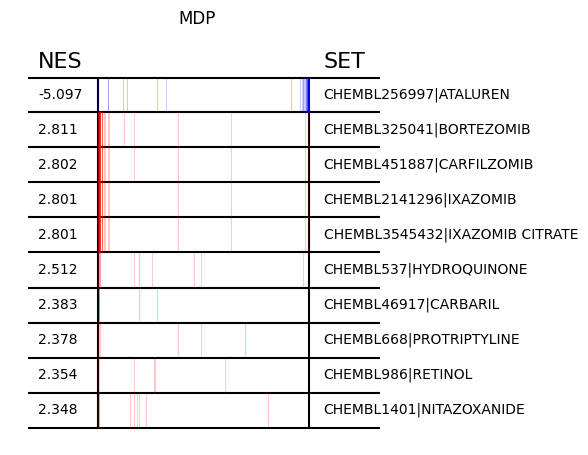

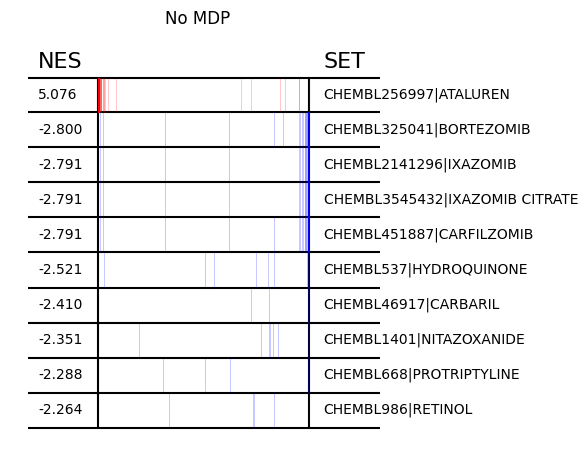

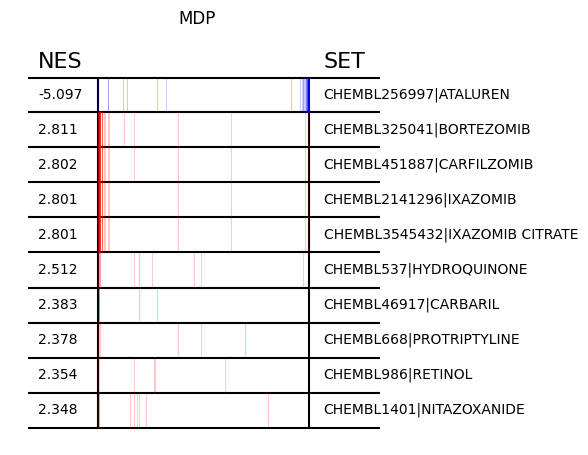

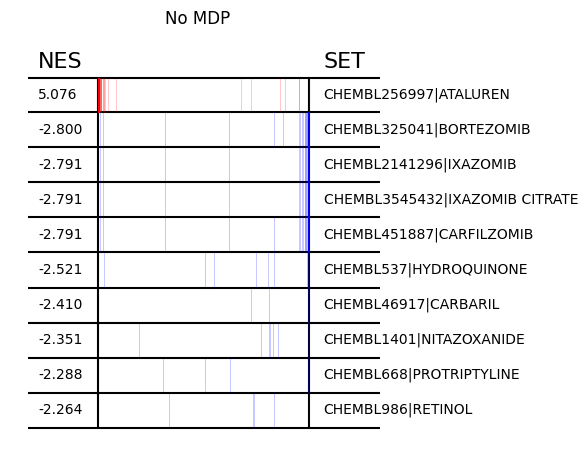

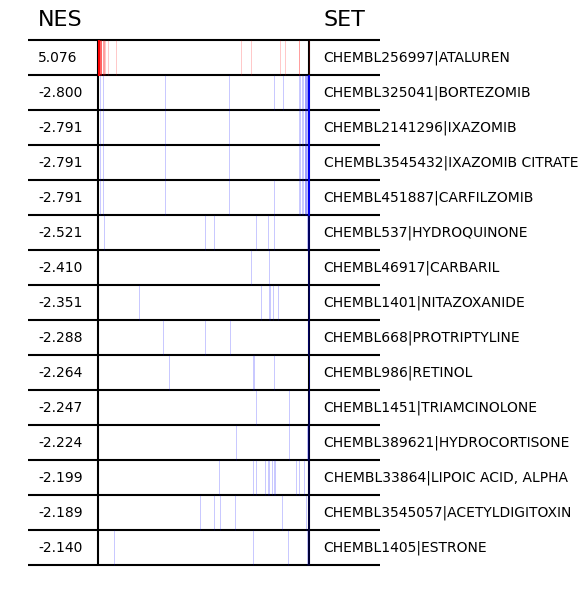

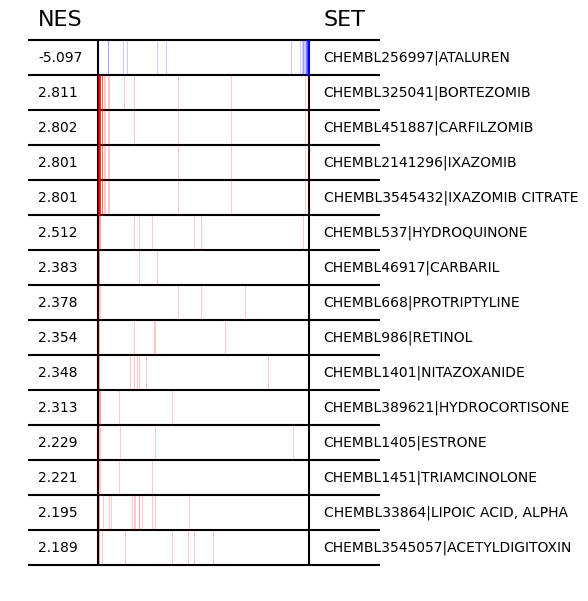

In [5]:
%%time

out_gsea = self.run_gsea()

### Composition Analysis

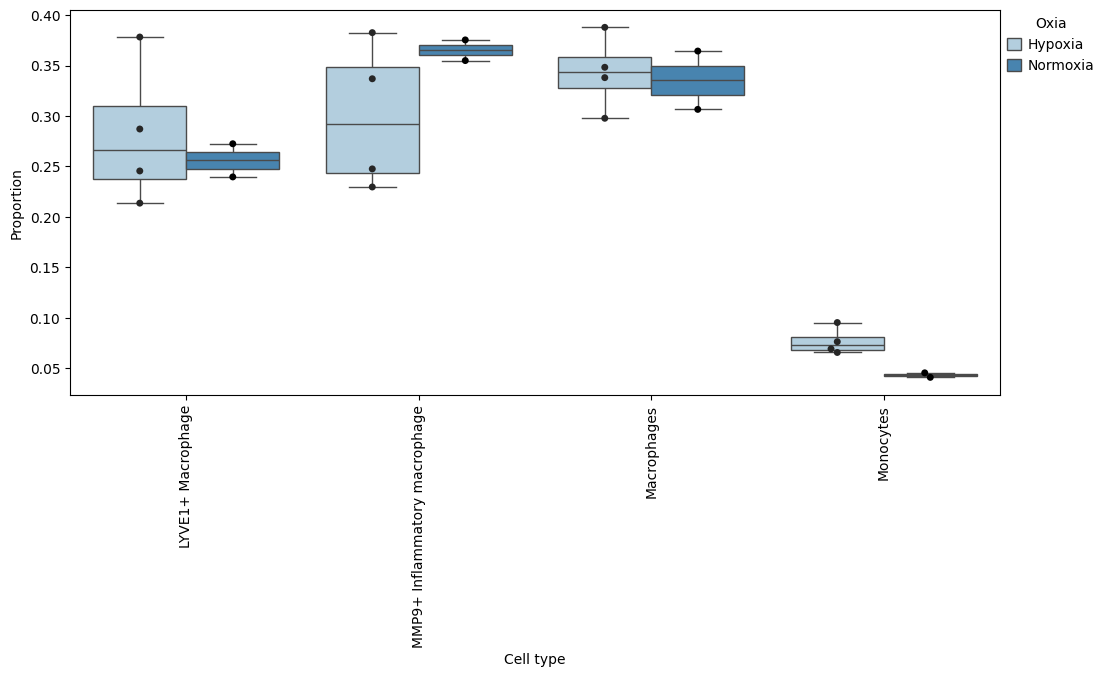

Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|██████████| 11000/11000 [00:19<00:00, 577.46it/s, 79 steps of size 6.15e-02. acc. prob=0.78] 


                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 6 samples, 4 cell types                                    │
│ Reference cell type                          │ Monocytes                                                        │
│ Formula                                      │ Oxia                                                             │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample                                                 │
│ Cell Type                                                                                                       │
│ LYVE1+ Macrophage                  3.086           1043.947                                                     │
│ MMP9+ Inflammatory macrophage      3.214           1186.501                                                     │
│ Macrophages                        3.313           1309.976                                                     │
│ Monocytes                          1.693            259.243                                                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate      Cell Type                                                                                        │
│ OxiaT.Normoxia LYVE1+ Macrophage                  0.000           1043.947           0.000                      │
│                MMP9+ Inflammatory macrophage      0.000           1186.501           0.000                      │
│                Macrophages                        0.000           1309.976           0.000                      │
│                Monocytes                          0.000            259.243           0.000                      │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 6 samples, 4 cell types                                    │
│ Reference cell type                          │ Monocytes                                                        │
│ Formula                                      │ Oxia                                                             │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample                                                 │
│ Cell Type                                                                                                       │
│ LYVE1+ Macrophage                  3.086           1043.947                                                     │
│ MMP9+ Inflammatory macrophage      3.214           1186.501                                                     │
│ Macrophages                        3.313           1309.976                                                     │
│ Monocytes                          1.693            259.243                                                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate      Cell Type                                                                                        │
│ OxiaT.Normoxia LYVE1+ Macrophage                  0.000           1043.947           0.000                      │
│                MMP9+ Inflammatory macrophage      0.000           1186.501           0.000                      │
│                Macrophages                        0.000           1309.976           0.000                      │
│                Monocytes                          0.000            259.243           0.000                      │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

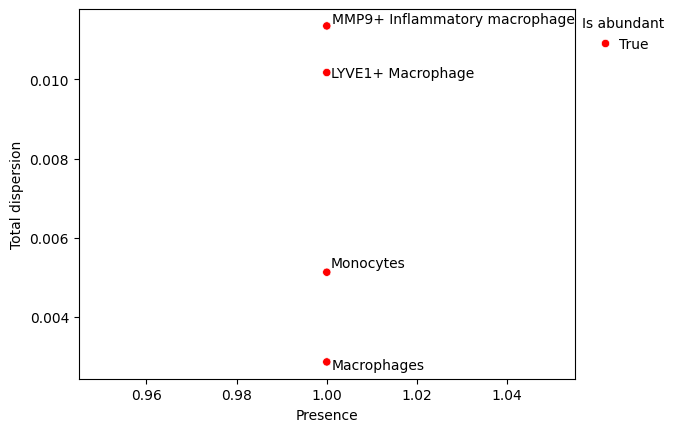

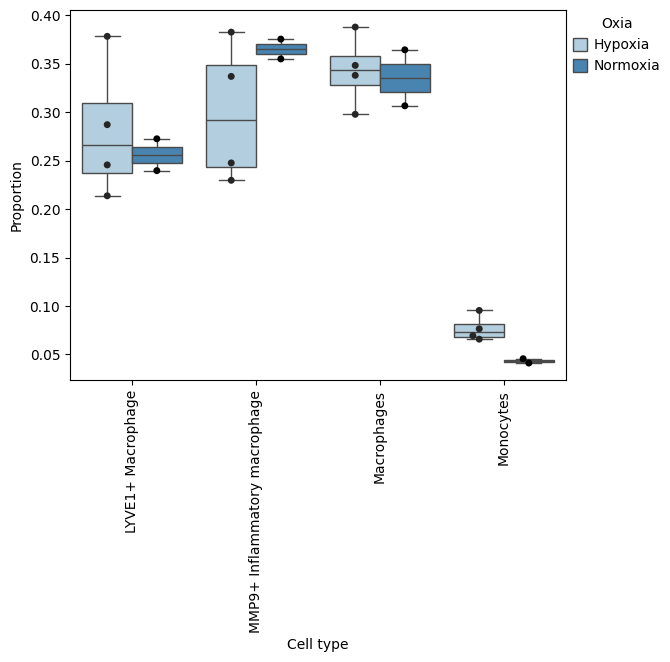

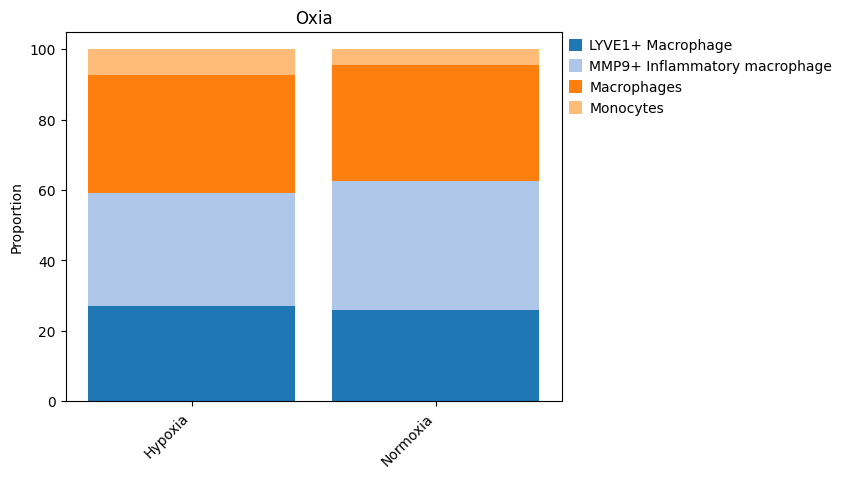

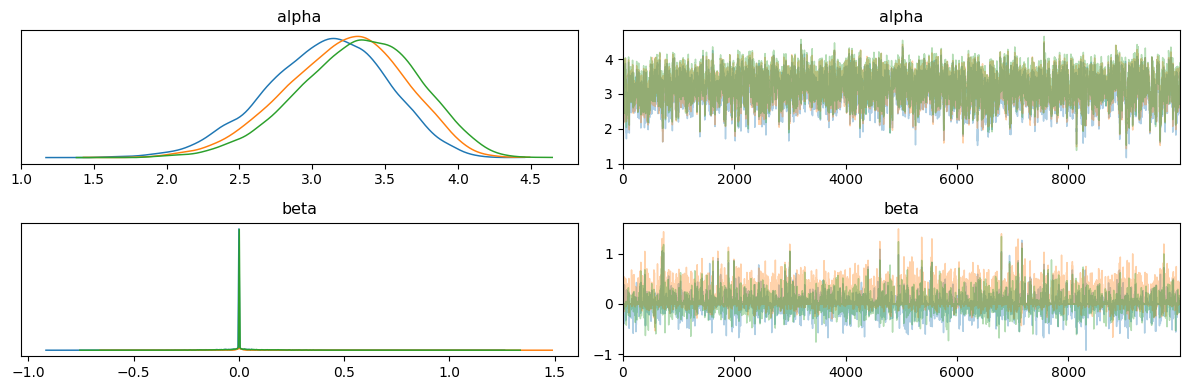




Composition analysis results stored in `self.rna.uns['composition']`.
CPU times: user 2min 30s, sys: 19 s, total: 2min 49s
Wall time: 2min 9s


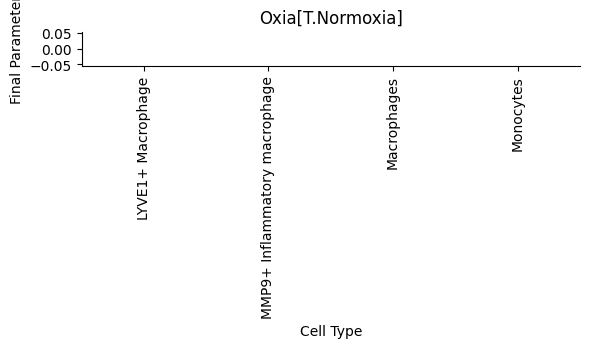

In [6]:
%%time

out_comp = self.run_composition_analysis(
    col_condition="Oxia", covariates=["MDP"],
    key_treatment="Hypoxia", key_control="Normoxia",
    reference_cell_type="Monocytes",
    col_sample_id=self._columns["col_sample_id"])

### Differential Expression Analysis

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 8.63 seconds.

Fitting dispersion trend curve...
... done in 2.29 seconds.

Fitting MAP dispersions...
... done in 6.17 seconds.

Fitting LFCs...
... done in 4.20 seconds.

Replacing 20 outlier genes.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Running Wald tests...
... done in 3.90 seconds.



Log2 fold change & Wald test p-value: Oxia Normoxia vs Hypoxia
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
gene_symbols                                                              
A1BG           565.767761        0.349362  0.154203  2.265602  0.023476   
A1BG-AS1        83.058861       -0.067993  0.081580 -0.833451  0.404590   
A1CF             0.152866        0.249310  1.994665  0.124988  0.900533   
A2M           2786.070312       -0.036382  0.091281 -0.398570  0.690210   
A2M-AS1          3.876023        0.527320  0.349757  1.507677  0.131637   
...                   ...             ...       ...       ...       ...   
ZXDC           279.694580        0.142144  0.110703  1.284018  0.199136   
ZYG11A           0.151172       -0.460241  3.246015 -0.141786  0.887249   
ZYG11B         520.470520        0.224440  0.166024  1.351857  0.176421   
ZYX           2241.584229        0.098165  0.126459  0.776263  0.437594   
ZZEF1          481.630707        0.05

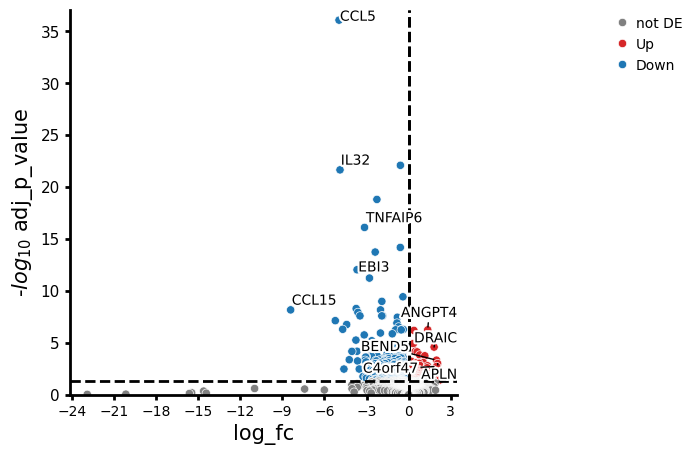

CPU times: user 1min, sys: 51.9 s, total: 1min 52s
Wall time: 53.7 s


In [7]:
%%time

pdata = self.bulk()
model, res = cr.ax.calculate_deg_covariates(
    pdata, layer="counts", col_condition="Oxia", col_covariate="MDP",
    key_control="Normoxia", key_treatment="Hypoxia")

### Multi-Cellular Programs

Not enough samples, but here's example code.

In [ ]:
# res_mcp, fig_mcp = self.run_dialogue(
#     n_programs=2, cmap="coolwarm", col_condition="Oxia",
#     key_control="Normoxia", key_treatment="Hypoxia")

### Cell-Cell Communication

#### Ligand-Receptor Analysis

In [ ]:
%%time

# _, res_lr, figs_lr = self.calculate_receptor_ligand()

#### Causal Network Analysis

You must run `self.calculate_receptor_ligand()` first.

In [ ]:
%%time

# key_source, key_target = "T cells", "Macrophages"
# res_cn, prob, fig_cn = self.calculate_causal_network(key_source, key_target)